In [16]:
import numpy as np
import scipy as sp
from scipy.ndimage import imread
from scipy.signal import correlate2d

1) Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using `scipy.signal.correlate2d` find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places.

In [17]:
im2_0 = imread("Data/im2-0.png")
im2_1 = imread("Data/im2-0.png")
print(im2_0.shape,im2_1.shape)

((288L, 288L, 4L), (288L, 288L, 4L))


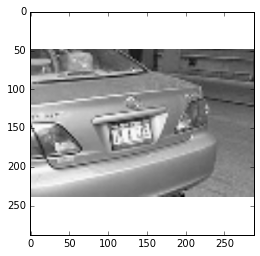

In [18]:
imshow(im2_0)

In [22]:
# resize the frames:
im2_0_rs = sp.misc.imresize(im2_0,300)
im2_1_rs = sp.misc.imresize(im2_1,300)
print(im2_0_rs.shape,im2_1_rs.shape)

((864L, 864L, 4L), (864L, 864L, 4L))


In [ ]:
# function to resize all the photos:
def photoResize(file_name, cmap = cm.Greys)L


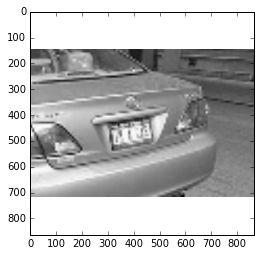

In [20]:
imshow(im2_0_rs)

In [21]:
# scipy.signal.correlate2d(in1, in2, mode='full', boundary='fill', fillvalue=0)
# Cross-correlate two 2-dimensional arrays.

zz = correlate2d(im2_0_rs,im2_1_rs,mode='full')
#imshow(zz)

ValueError: object too deep for desired array

In [ ]:
correlate2d

2) shift each image to register the frames to the original (expanded in size) frame. You should, in general, be shifting by subpixel offsets.

3) Combine all the registered images to form a super-resolution image. What does the license plate read?

### scipy.misc.imresize(arr, size, interp='bilinear', mode=None)
Resize an image.

Parameters:	
arr : ndarray
The array of image to be resized.
size : int, float or tuple
int - Percentage of current size.
float - Fraction of current size.
tuple - Size of the output image.
interp : str, optional
Interpolation to use for re-sizing (‘nearest’, ‘bilinear’, ‘bicubic’ or ‘cubic’).
mode : str, optional
The PIL image mode (‘P’, ‘L’, etc.) to convert arr before resizing.
Returns:	
imresize : ndarray
The resized array of image.

## Solution

In [ ]:
# Python_for_Data_Science/Kevin

In [25]:
from scipy.ndimage import imread
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [27]:
# Collect all the images:
import os
image_dir = "Data"
img_names = [x for x in sorted(os.listdir(image_dir)) if x.startswith("im2-")]
img_paths = [os.path.join(image_dir, x) for x in img_names]

In [28]:
def fig_input(file_name, cmap = cm.Greys):
    tmp = sp.ndimage.imread(file_name, flatten = True)
    imshow(tmp,cmap)
    return tmp

In [32]:
def shift(im, im_base):
    # function to compute offset between two images
    corr = fftconvolve(im_base[::-1, ::-1], im, mode='full')
    # finding the index of the highest correlation
    idx = np.unravel_index(np.abs(corr.argmax()), corr.shape)
    # Compute the offset
    origin = np.array(corr.shape)/2
    offset = idx - origin
    return offset

In [34]:
#----- Allocating Arrays for Resized Figures and threshold images -----#
ori_size = (288,288)
resized = np.empty((len(img_paths), ori_size[0]*3, ori_size[1]*3))
thresholded = np.empty((len(img_paths), ori_size[0]*3, ori_size[1]*3))
for i, (img_name, img_path) in enumerate(zip(img_names, img_paths)):    
    resized[i] = zoom(sp.ndimage.imread(img_path, flatten = True), 3)
    #-------------------- Thresholding ------------------#
    # We will threshold the images s.t. 1/2 of the image is dark.
    # W/O the thresholding, the correlation will always be the highest at 
    # the center of the image
    tmp = resized[i].copy()
    tmp[:150] = 0
    tmp[715:] = 0
    tmp[tmp <= np.percentile(tmp[150:715].ravel(), 50)] = 0
    thresholded [i] = tmp

In [36]:
offsets = -np.array([shift(im, thresholded[0]) for im in thresholded], dtype = 'f8')

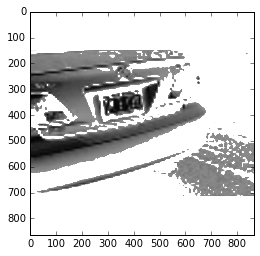

In [37]:
imshow(thresholded[8],cmap=cm.Greys)

In [40]:
# Shifting the original (unthresholded but zoomed) image
im_shift = sp.ndimage.interpolation.shift
shifted = np.array([im_shift(im, offset) for im, offset in zip(resized, offsets)])

In [41]:
shifted.shape

(100L, 864L, 864L)

In [44]:
# Combining all images to form a super-resolution image
sr_img = np.median(shifted, axis = 0)

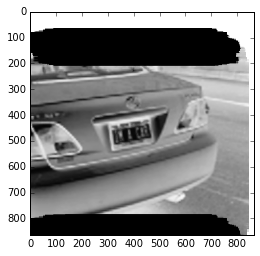

In [45]:
plt.imshow(sr_img, cmap = cm.Greys)

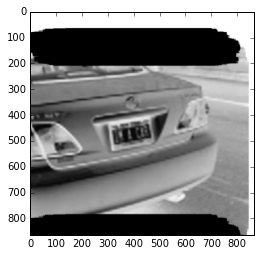

In [56]:
from scipy.ndimage.filters import gaussian_filter
plt.imshow(gaussian_filter(sr_img,1.5), cmap = cm.Greys)